<a href="https://colab.research.google.com/github/HeribertoGodoy/Tareas-EIE-401-/blob/main/Actividades/Actividad%204/Actividad_4_GodoyHeriberto_203197551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Heriberto Godoy</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


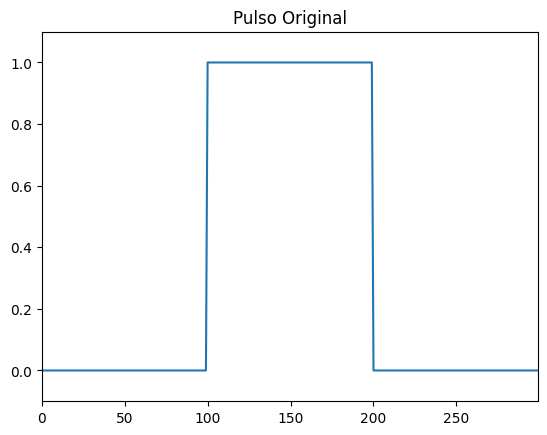

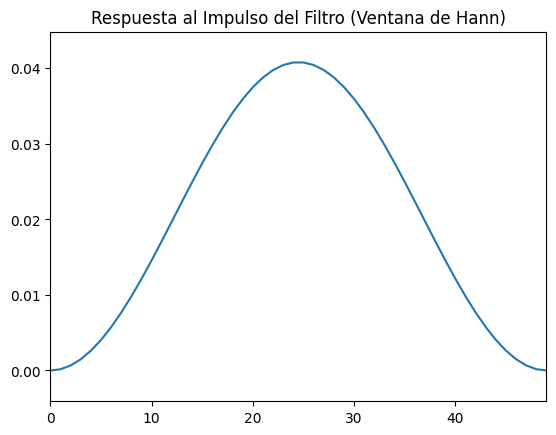

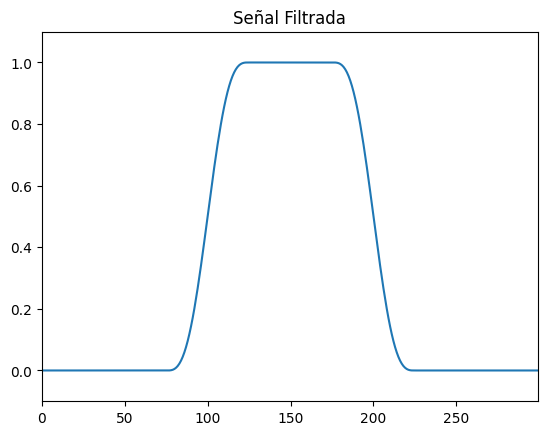

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal de pulso con un patrón repetido
sig = np.repeat([0., 1., 0.], 100)

# Crear una ventana de Hann manualmente
win = np.hanning(50)

# Normalizar la ventana para que la suma sea 1
win /= win.sum()

# Filtrar la señal convolucionándola con la ventana de Hann
filtered = np.convolve(sig, win, mode='same')

# Graficar la señal original
plt.plot(sig)
plt.title('Pulso Original')
plt.margins(0, 0.1)
plt.show()

# Graficar la ventana de Hann
plt.plot(win)
plt.title('Respuesta al Impulso del Filtro (Ventana de Hann)')
plt.margins(0, 0.1)
plt.show()

# Graficar la señal filtrada
plt.plot(filtered)
plt.title('Señal Filtrada')
plt.margins(0, 0.1)
plt.show()


## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


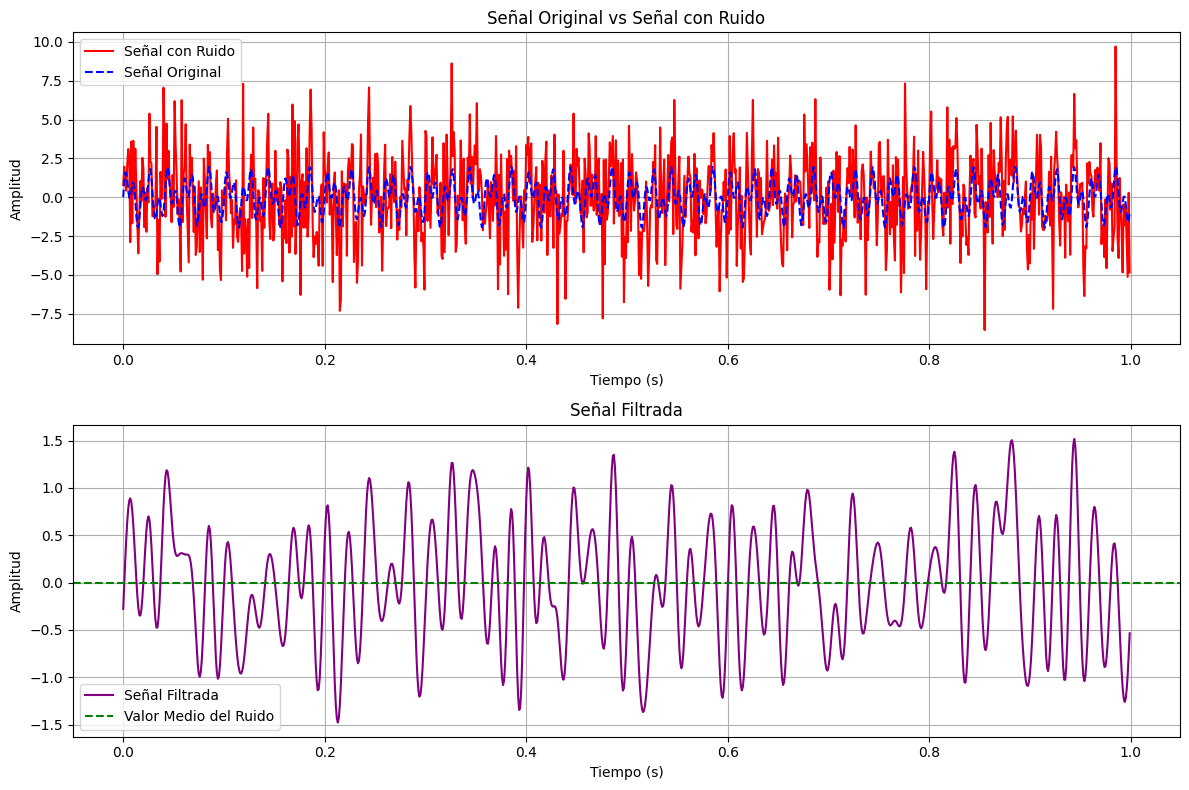

Valor medio de la señal con ruido: -0.006393463264784152


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
dt = 0.001
t = np.arange(0, 1, dt)
senal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # señal compuesta
senal_original = senal.copy() # copia para comparación posterior
senal = senal + 2.5 * np.random.randn(len(t))
minsenal, maxsenal = senal.min(), senal.max()

# Cálculo del valor medio de la señal con ruido
valor_medio_ruido = np.mean(senal)

## Cálculo de la Transformada de Fourier
n = len(t)
fhat = np.fft.fft(senal, n) # calcula la FFT
psd = fhat * np.conj(fhat) / n
frec = (1/(dt*n)) * np.arange(n) # arreglo de frecuencias
indices_mitad = np.arange(1, np.floor(n/2), dtype=np.int32) # índices de la primera mitad


# Filtrado en el dominio de la frecuencia
fc = 70  # Frecuencia de corte del filtro pasa bajos
fhat_filtrado = fhat.copy()
fhat_filtrado[(frec > fc)] = 0  # Aplicamos el filtro pasa bajos
senal_filtrada = np.fft.ifft(fhat_filtrado)  # Transformada inversa para obtener la señal filtrada en el dominio del tiempo


# Gráfica
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, senal, label='Señal con Ruido', color='red')
plt.plot(t, senal_original, label='Señal Original', color='blue', linestyle='--')
plt.title('Señal Original vs Señal con Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, np.real(senal_filtrada), label='Señal Filtrada', color='purple')
plt.title('Señal Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Añadir el valor medio de la señal con ruido a la gráfica
plt.axhline(y=valor_medio_ruido, color='green', linestyle='--', label='Valor Medio del Ruido')
plt.legend()

plt.tight_layout()
plt.show()

print("Valor medio de la señal con ruido:", valor_medio_ruido)



## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


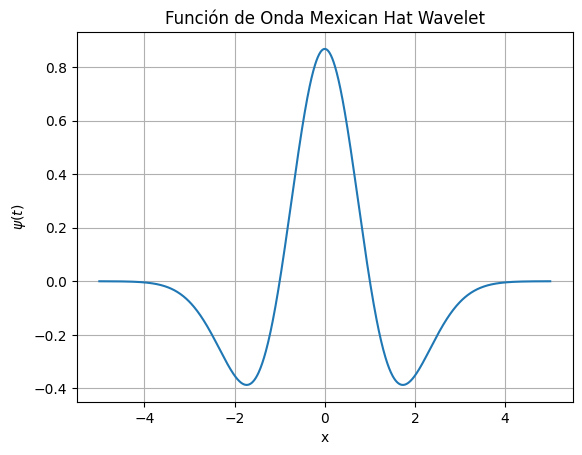

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    """
    Función que calcula la forma de la función de onda Mexican Hat Wavelet.

    Parámetros:
    - x: Array de valores de la variable independiente.
    - mu: Parámetro de posición que determina el punto central de la función.
    - sigma: Parámetro de escala que controla el ancho de la campana.

    Retorna:
    - Array con los valores de la función de onda en los puntos dados por x.
    """
    return (2 / (np.sqrt(3) * np.power(np.pi, 1/4))) * np.exp(-0.5 * np.power(x - mu, 2)) * (1 - np.power(x - mu, 2) / np.power(sigma, 2))

# Definir valores de la función
x_values = np.linspace(-5, 5, 1000)  # Valores de x para evaluar la función
mu = 0.0  # Parámetro de posición
sigma = 1.0  # Parámetro de escala

# Calcular la función de onda Mexican Hat
funcion = mexican_hat(x_values, mu, sigma)

# Graficar la función de onda
plt.plot(x_values, funcion)
plt.title('Función de Onda Mexican Hat Wavelet')
plt.xlabel('x')
plt.ylabel('$\psi(t)$')
plt.grid(True)
plt.show()




### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

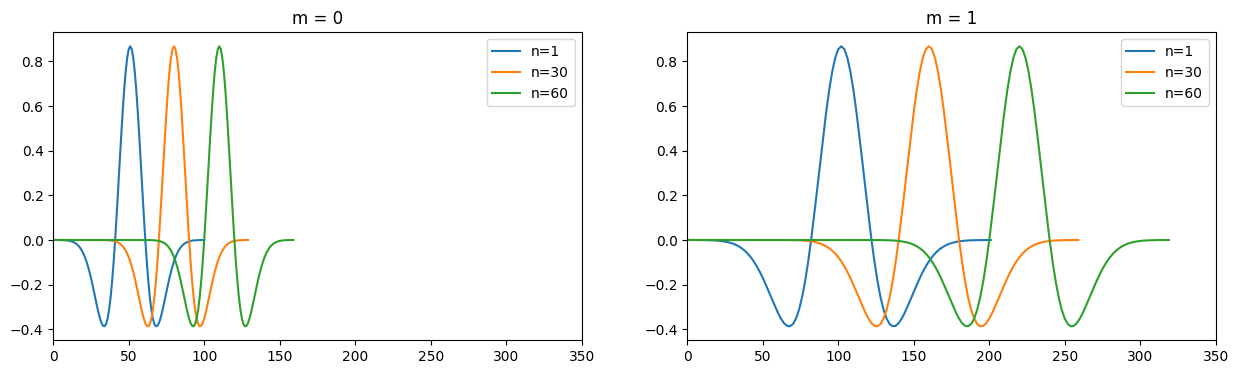

In [4]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
# using just o pair, means an specific wavelet

# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Definir una función llamada psi_mn que calcula la transformación de escala y traslación de una función wavelet

def psi_mn(psi, m, n):
    # Calcular los factores de escala (a) y traslación (b) según los parámetros m y n
    a = 2**m
    b = n*2**m

    # Crear un array de ceros con la longitud adecuada (la de psi) para almacenar el resultado de la transformación
    wav = np.zeros(len(psi)*a + b)

    # Interpolar la función wavelet psi para ajustarla a la escala y traslación deseadas
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)

    # Devolver el resultado de la transformación wavelet
    return wav

# Calcular la función wavelet Mexican Hat para valores de x en el rango de -5 a 5 con un paso de 0.1
psi = mexican_hat(np.arange(-5,5,0.1),0,1)

# Definir el rango de visualización en el eje x
xlim = (0,350)

# Definir los valores de n (traslación) y m (escala) para la transformación wavelet
ns = [1, 30, 60]  # Valores de traslación
ms = [0, 1]        # Valores de escala

# La variable m representa el nivel de escala de la transformación wavelet.
# Un valor de m más alto indica una escala más grande de la wavelet.

# La variable n representa el nivel de traslación de la transformación wavelet.
# Un valor de n más alto indica una traslación mayor de la wavelet en el eje x.

# Configurar el gráfico
plt.figure(figsize=(15,4))

# Bucle sobre los valores de m
for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)  # Crear un subplot para cada valor de m

    # Bucle sobre los valores de n
    for n in ns:
        # Calcular y graficar la transformación wavelet psi_mn para el par de valores m y n
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))  # Graficar la transformación wavelet con m y n dados

    # Configurar el título y leyenda
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)

plt.show()


### 3.2.2 completa el siguiente código para realizar la transformada


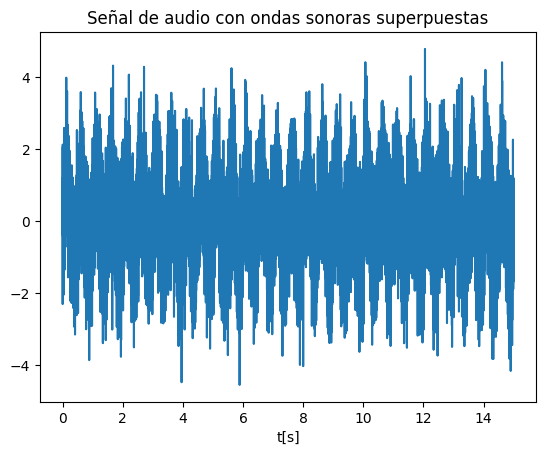

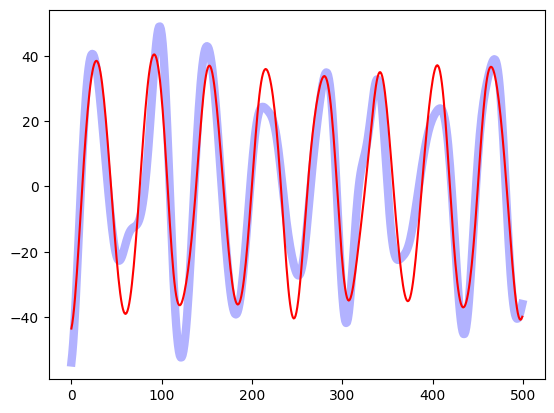

In [5]:
# Función para calcular la transformada Wavelet discreta considerando la suma sobre la sección bajo estudio
def twav_mn(f, psi, m, n):
    # Escalamos la señal f según la escala m
    f_scaled = f[::2**m]
    # Calculamos el factor de escala total
    # (m/2.0 se debe a la mitad del exponente de la escala en la fórmula de la DWT)
    scale_factor = 2**(m/2.0)
    # Realizamos la suma ponderada de la señal escalada por la wavelet psi en el intervalo [n, n + len(psi)]
    return scale_factor * np.sum(f_scaled[n:n+len(psi)] * psi)

# Función para calcular la transformada Wavelet discreta sumando sobre toda la longitud de la señal
def twav_mn_naive(f, psi, m, n):
    # Calculamos la wavelet en el punto m, n
    pmn = psi_mn(psi, m, n)
    # Realizamos la suma ponderada de la señal original por la wavelet pmn
    return 2**(-m/2.0) * np.sum(f[:len(pmn)] * pmn)

# Definición de parámetros
m = 3  # valor único para m
ns = np.arange(1000, 1500)  # índices para la transformación
res = 1000  # resolución de la señal
freq = 2  # frecuencia de la señal

# Creación de una señal de audio para análisis
x = np.arange(0, 15000, 1)  # tiempo
noise = np.random.normal(0, 1, len(x))  # ruido
# Señal de audio (sinusoide con ruido)
audio = np.sin(np.arange(15000) * 2 * np.pi * freq / res) + noise

# Transformada usando la función considerando la suma sobre la sección bajo estudio
transformed_sweept = [twav_mn(audio, psi, m, n) for n in ns]
# Transformada usando la función con suma sobre toda la longitud de la señal
naive_transformed_sweept = [twav_mn_naive(audio, psi, m, n) for n in ns]

# Graficación de la señal de audio
plt.plot(np.arange(len(audio), dtype="float32") / res, audio)
plt.xlabel("t[s]")
plt.title("Señal de audio con ondas sonoras superpuestas")
plt.show()

# Graficación de las transformadas
plt.plot(transformed_sweept, color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()


### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

In [19]:
!pip install pywavelets

In [18]:

import pandas as pd

# Descargar los datos desde la URL con pandas
url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
datos = pd.read_csv(url)
datos.squeeze()

0     -0.30
1     -0.14
2     -0.41
3     -0.46
4     -0.66
       ... 
498   -0.22
499    0.08
500   -0.08
501   -0.18
502   -0.06
Name: -0.15, Length: 503, dtype: float64

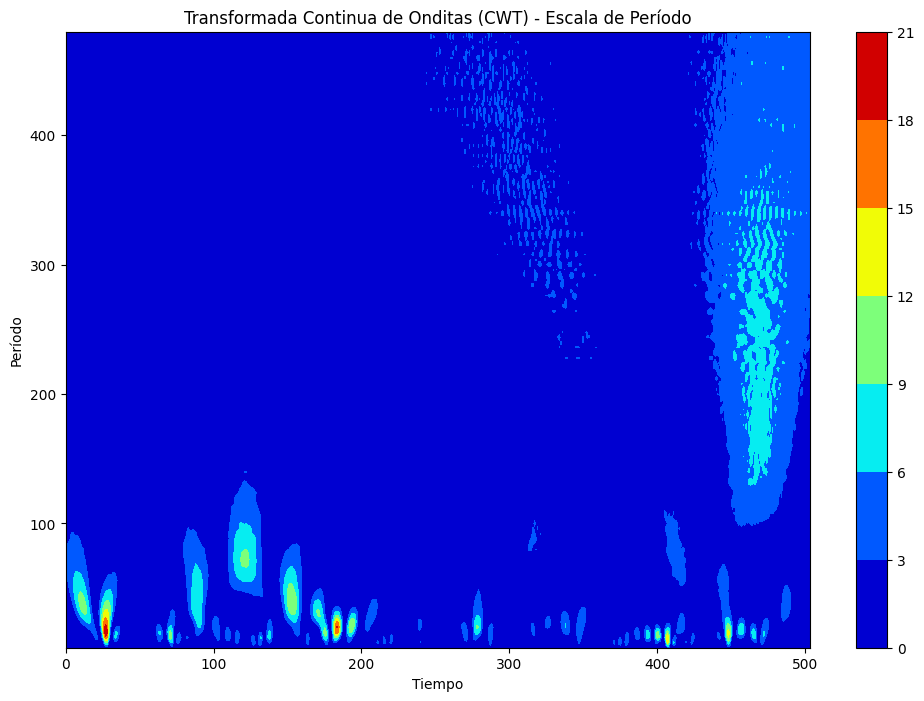

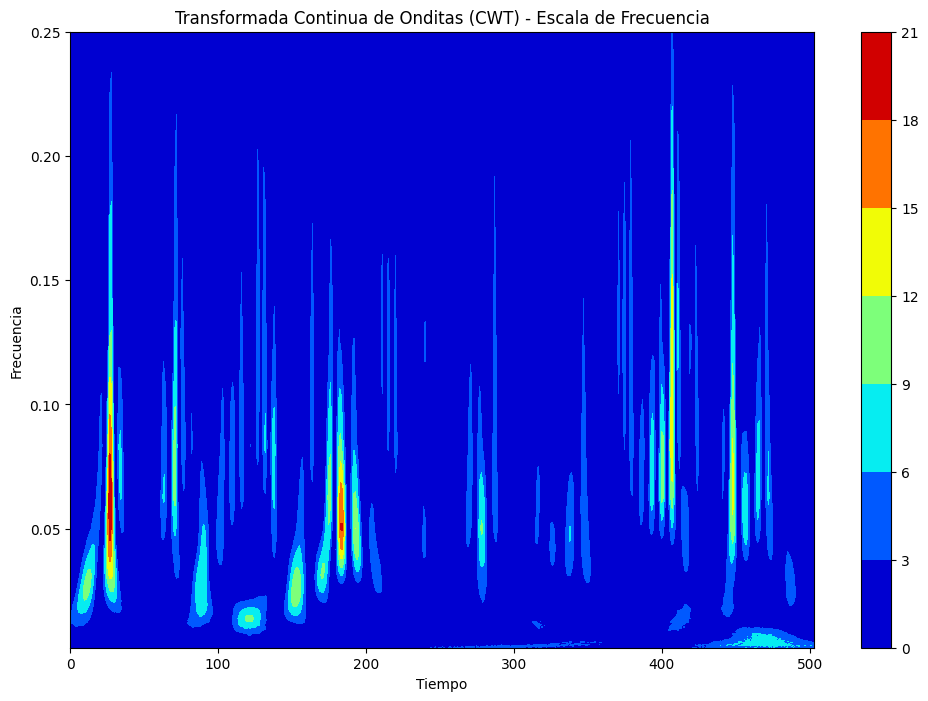

In [21]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

# Descargar los datos desde la URL con pandas
url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
datos = pd.read_csv(url, header=None)

# Convertir DataFrame a arreglo unidimensional
datos_array = datos.squeeze().values

# Aplicar la transformada continua con la onda mexicana (Mexican Hat)
wavelet = "mexh"
escalas = np.arange(1, 121)
# Realizar la transformada continua de onditas (CWT)
# sampling_period se refiere al período de muestreo, que en este caso es 1 ya que los datos están muestreados de forma regular
coef, frecuencias = pywt.cwt(datos_array, escalas, wavelet, sampling_period=1)

# Obtener los coeficientes en términos de potencia
potencia = np.abs(coef)**2

# Preparar los ejes para graficar
periodos = 1 / frecuencias
tiempo = np.arange(len(datos_array))

# Graficar la potencia en términos de período
plt.figure(figsize=(12, 8))
# Graficar el contorno de la potencia
plt.contourf(tiempo, periodos, potencia, cmap='jet')
# Etiquetas de los ejes y título del gráfico
plt.xlabel('Tiempo')
plt.ylabel('Período')
plt.title('Transformada Continua de Onditas (CWT) - Escala de Período')
# Mostrar la barra de color que representa la escala de colores de la potencia
plt.colorbar()
plt.show()

# Graficar la potencia en términos de frecuencia
plt.figure(figsize=(12, 8))
# Graficar el contorno de la potencia
plt.contourf(tiempo, frecuencias, potencia, cmap='jet')
# Etiquetas de los ejes y título del gráfico
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Transformada Continua de Onditas (CWT) - Escala de Frecuencia')
# Mostrar la barra de color que representa la escala de colores de la potencia
plt.colorbar()
plt.show()


### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.



1. Gráfico en el Período:
El eje x representa el tiempo, que es la posición en la serie temporal.
El eje y representa el período, que es la escala de tiempo asociada con las diferentes frecuencias.
Los colores en el gráfico representan la potencia de las componentes de frecuencia en diferentes momentos.
Las áreas más coloreadas indican una mayor concentración de energía para ciertos períodos y frecuencias.
2. Gráfico de Frecuencia:
El eje x nuevamente representa el tiempo.
El eje y representa la frecuencia, que es el inverso del período.
Los colores en este gráfico representan la potencia de las componentes de frecuencia en diferentes frecuencias.
Las áreas más coloreadas indican regiones de alta potencia en el espectro.


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/